In [1]:
# clustering of runtime and rating for each film genres
'''
decided to use imdb_score because imdb is more popular and professional while
also because we are focussing on the top 5 genres based on imdb votes
'''

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score

from vat import VAT
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

filename = pd.read_csv('titles_mod2.csv')
#we are only focusing on the runtime and imdb score of movies with western genre
data = filename[['genres','runtime','imdb_score']]

western = data[data['genres'].str.contains('western')]
thriller = data[data['genres'].str.contains('thriller')]
scifi = data[data['genres'].str.contains('scifi')]
war = data[data['genres'].str.contains('war')]
crime = data[data['genres'].str.contains('crime')]


In [2]:
# create a dictionary to store the value of pearson correlation of each genre
pearson_result = {}

In [3]:
# gathered the relevant data for top 4 genres based on the average number of imdb votes
western = western[['runtime', 'imdb_score']]
thriller = thriller[['runtime', 'imdb_score']]
scifi = scifi[['runtime', 'imdb_score']]
war = war[['runtime', 'imdb_score']]


In [4]:
# Plot VAT
def plot_vta(data, genre_type, title):
    normalized_data = MinMaxScaler().fit_transform(data)

    
    RV, _, I = VAT(normalized_data) # I are the reordered indices

    plt.figure(figsize=(8, 7))
    sns.heatmap(RV, cmap='gray')
    plt.title("VAT of " + title)
    plt.savefig("Figures/" +genre_type + "VAT.png")
    plt.show()

In [8]:
def plot_kmeans(df, clusters, xAxis, yAxis, genre):
    """
    generate a 2d plot given sklearn's kmeans implementation 
    """
    colormap = {0: 'green', 1: 'red', 2: 'blue', 3: 'orange'}
    
    fig = plt.figure(figsize=(7, 10))
    
    plt.scatter(df[xAxis], 
               df[yAxis], 
               c=[colormap.get(x) for x in clusters.labels_])
    
    plt.ylabel(yAxis, fontsize=20)
    plt.xlabel(xAxis, fontsize=20)
    
    #the following line create the legend of clusters
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colormap.values()]
    plt.legend(markers, colormap.keys(), numpoints=1)
    plt.savefig("Figures/" + genre + "RuntimeClustering.png")
    plt.show()

In [6]:
#calculate the Calinski-Harabasz Index for range of number of clusters
#reference from: https://pyshark.com/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/
def CH_indexes(X, title):
    results = {}
    for i in range(2,7):
        kmeans = KMeans(n_clusters=i, random_state=30)
        labels = kmeans.fit_predict(X)
        db_index = calinski_harabasz_score(X, labels)
        results.update({i: db_index})
    plt.plot(list(results.keys()), list(results.values()))
    plt.title("Calinski-Harabsz Index of " + title + " movies")
    plt.xlabel("Number of clusters")
    plt.ylabel("Calinski-Harabsz Index")
    plt.savefig("Figures/" +title + "CH_index.png")
    plt.show()

**WESTERN GENRE**

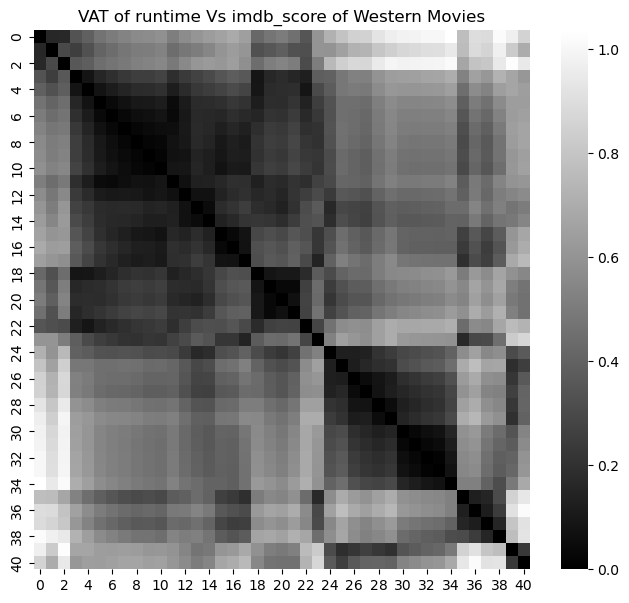

In [7]:
plot_vta(western, "Western", "runtime Vs imdb_score of Western Movies")

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


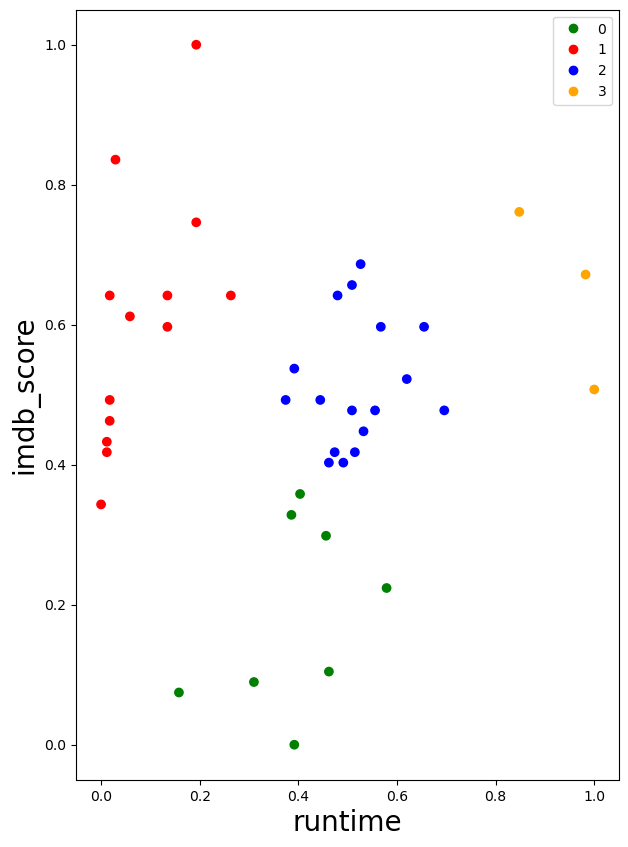

In [9]:
normalized_data = MinMaxScaler().fit_transform(western)
normalized_data = pd.DataFrame(normalized_data, columns=western.columns)
clusters = KMeans(n_clusters=4).fit(normalized_data)
plot_kmeans(normalized_data, clusters, 'runtime', 'imdb_score', 'Western')

In [9]:
#create a table that shows the centroid of each clusters
df_cluster_centers = pd.DataFrame(clusters.cluster_centers_, columns=['runtime', 'imdb_score'])
print(df_cluster_centers)


    runtime  imdb_score
0  0.517716    0.514486
1  0.083221    0.605052
2  0.393275    0.184701
3  0.943470    0.646766


/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

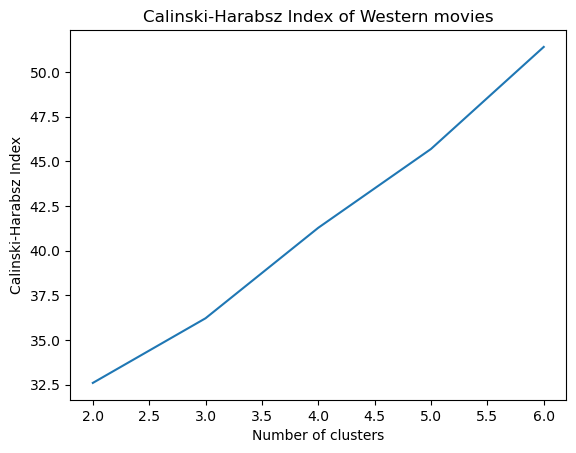

In [10]:
CH_indexes(normalized_data, "Western")

In [11]:
FEATURES = ['runtime', 'imdb_score']

western[FEATURES].corr(method='pearson')



,runtime,imdb_score
runtime,1.00000,0.00326
imdb_score,0.00326,1.00000


In [12]:
#add pearson correlation to the result dict
pearson_result["western"] = 0.00326

**THRILLER GENRE**

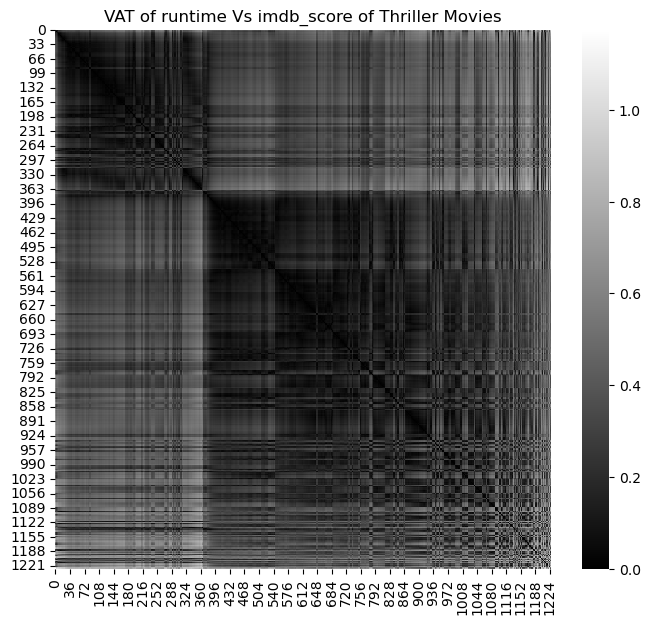

In [13]:
plot_vta(thriller, "Thriller", "runtime Vs imdb_score of Thriller Movies")

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


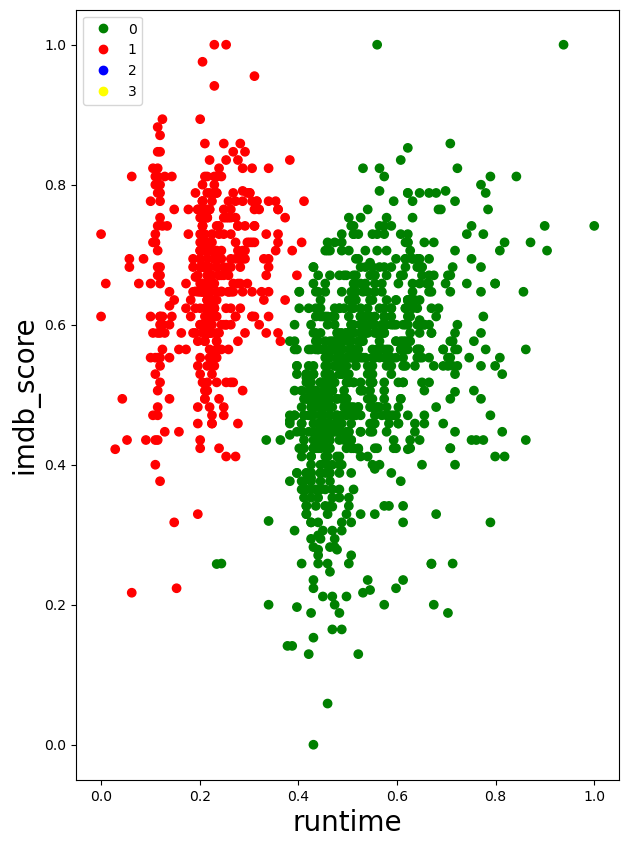

In [14]:
normalized_data = MinMaxScaler().fit_transform(thriller)
normalized_data = pd.DataFrame(normalized_data, columns=western.columns)
clusters = KMeans(n_clusters=2).fit(normalized_data)
plot_kmeans(normalized_data, clusters, 'runtime', 'imdb_score', 'Thriller')

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

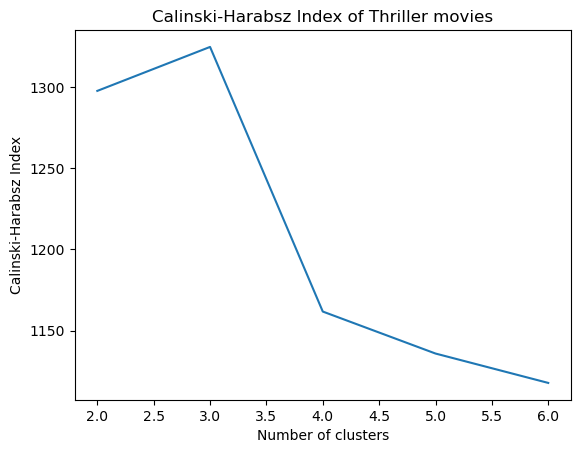

In [15]:
CH_indexes(normalized_data, "Thriller")

In [16]:
#create a table that shows the centroid of each clusters
df_cluster_centers = pd.DataFrame(clusters.cluster_centers_, columns=['runtime', 'imdb_score'])
print(df_cluster_centers)

    runtime  imdb_score
0  0.536454    0.526848
1  0.216821    0.662874


In [17]:
thriller[FEATURES].corr(method='pearson')

,runtime,imdb_score
runtime,1.00000,-0.21036
imdb_score,-0.21036,1.00000


In [18]:
#add pearson correlation to the result dict
pearson_result["thriller"] = -0.21036

**SCIFI GENRE**

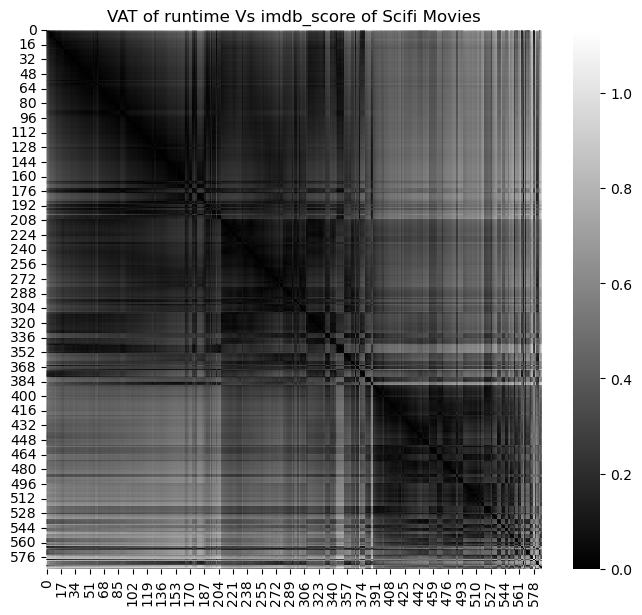

In [19]:
plot_vta(scifi, "Scifi", "runtime Vs imdb_score of Scifi Movies")

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


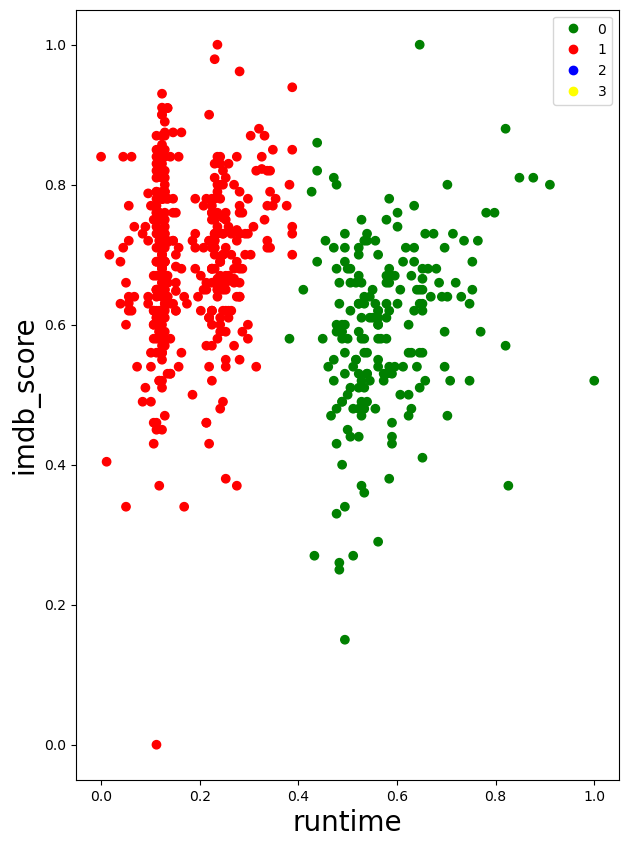

In [20]:
normalized_data = MinMaxScaler().fit_transform(scifi)
normalized_data = pd.DataFrame(normalized_data, columns=western.columns)
clusters = KMeans(n_clusters=2).fit(normalized_data)
plot_kmeans(normalized_data, clusters, 'runtime', 'imdb_score', 'Scifi')

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

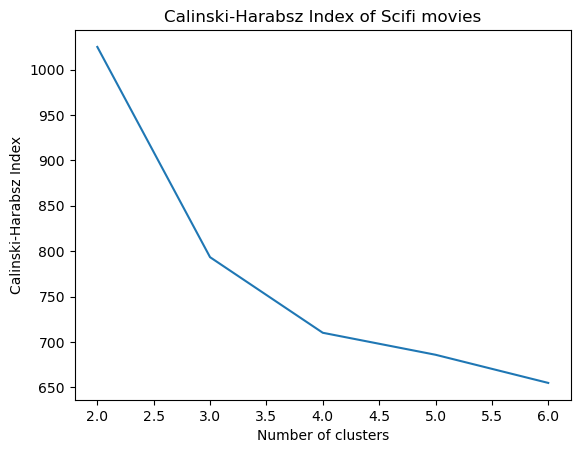

In [21]:
CH_indexes(normalized_data, "Scifi")

In [22]:
#create a table that shows the centroid of each clusters
df_cluster_centers = pd.DataFrame(clusters.cluster_centers_, columns=['runtime', 'imdb_score'])
print(df_cluster_centers)

    runtime  imdb_score
0  0.579821    0.596120
1  0.178901    0.692004


In [23]:
scifi[FEATURES].corr(method='pearson')

,runtime,imdb_score
runtime,1.000000,-0.249017
imdb_score,-0.249017,1.000000


In [24]:
#add pearson correlation to the result dict
pearson_result["scifi"] = -0.249017

**WAR GENRE**

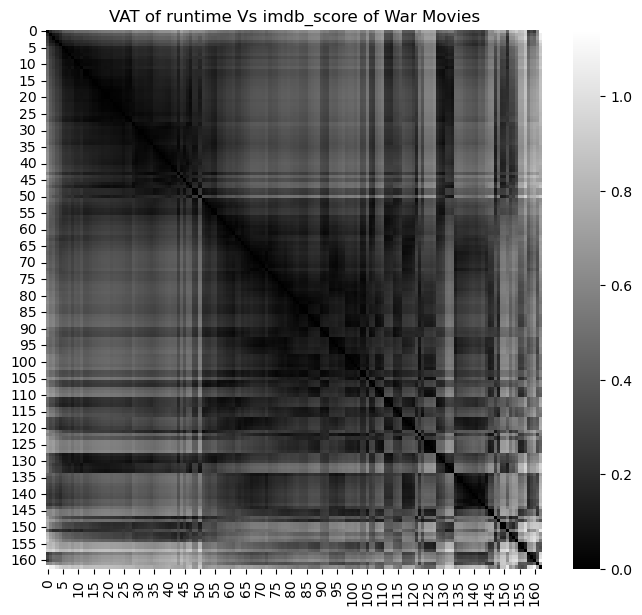

In [25]:
plot_vta(war, "War", "runtime Vs imdb_score of War Movies")

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


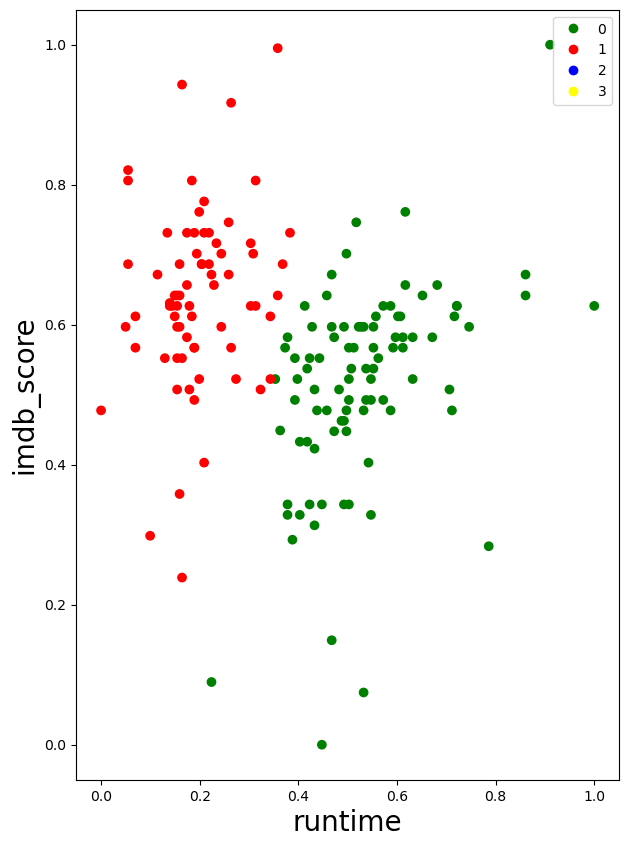

In [26]:
normalized_data = MinMaxScaler().fit_transform(war)
normalized_data = pd.DataFrame(normalized_data, columns=western.columns)
clusters = KMeans(n_clusters=2).fit(normalized_data)
plot_kmeans(normalized_data, clusters, 'runtime', 'imdb_score', 'War')

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

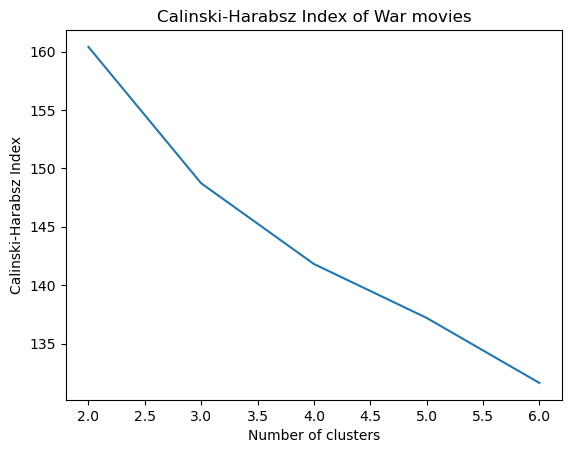

In [27]:
CH_indexes(normalized_data, "War")

In [28]:
#create a table that shows the centroid of each clusters
#reference from https://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/tutorial8.html
df_cluster_centers = pd.DataFrame(clusters.cluster_centers_, columns=['runtime', 'imdb_score'])
print(df_cluster_centers)

    runtime  imdb_score
0  0.533041    0.514769
1  0.197674    0.639600


In [29]:
war[FEATURES].corr(method='pearson')

,runtime,imdb_score
runtime,1.000000,-0.145516
imdb_score,-0.145516,1.000000


In [30]:
#add pearson correlation to the result dict
pearson_result["war"] = -0.145516